# Heart Disease Prediction

## Installing the desired version of Scikit Learn

In [218]:
!pip install scikit-learn==1.3.2

In [219]:
import sklearn
print(sklearn.__version__)

1.3.2


## Importing required Libraries

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'cleaned_dataset_heart.csv', 'dataset_heart.csv', '.ipynb_checkpoints', 'sample_data']


## Loading the dataset

In [221]:
# Load your dataset into a DataFrame called df
dataframe = pd.read_csv('dataset_heart.csv')

In [222]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## Pre-processing of the Dataset

### Removing Duplicates

In [223]:
# Remove duplicate values
dataframe.drop_duplicates(inplace=True)

# Print the total remaining values
print(f"Total remaining values: {len(dataframe)}")

Total remaining values: 918


### Removing negatives from Oldpeak (as they are invalid for the oldpeak)

In [224]:
# Remove negative values from the 'oldpeak' column
dataframe = dataframe[dataframe['oldpeak'] >= 0]

# Print the total remaining values
print(f"Total remaining values: {len(dataframe)}")

Total remaining values: 905


### Using Hot Deck Imputation for filling the invalid zeroes in 'colesterol' and 'resting_bps' column

In [225]:
# Specify the column names
column_names = ['cholesterol', 'resting_bp_s']

# Perform hot deck imputation
for col in column_names:
    # Create a copy of the column
    col_copy = dataframe[col].copy()

    # Identify the non-zero values
    non_zero_values = col_copy[col_copy != 0]

    # Replace the zero values with a random non-zero value
    col_copy[col_copy == 0] = non_zero_values.sample(col_copy[col_copy == 0].count(), replace=True).values

    # Update the original column
    dataframe[col] = col_copy

# Print the updated DataFrame
print(dataframe)

# Print the total remaining values
print(f"Total remaining values: {len(dataframe)}")

      age  sex  chest_pain_type  resting_bp_s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

### Using the cleaned dataset set for further evaluation

In [226]:
#Uploading the Cleaned Dataset
df = pd.read_csv('cleaned_dataset_heart.csv')

In [227]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [228]:
df.tail()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
900,45,1,1,110,264,0,0,132,0,1.2,2,1
901,68,1,4,144,193,1,0,141,0,3.4,2,1
902,57,1,4,130,131,0,0,115,1,1.2,2,1
903,57,0,2,130,236,0,2,174,0,0.0,2,1
904,38,1,3,138,175,0,0,173,0,0.0,1,0


In [229]:
df.shape

(905, 12)

## Feature Extraction

### Dropping the 'fasting_blood_sugar' column as 77% of the data contains zero and has no meaning to our classification. The 'tagert' is the output value.

In [230]:
#Feature Extraction
x_data = df.drop(['target', 'fasting_blood_sugar'], axis = 1)
y = df['target']

### Perform PCA on the feature data

Explained Variance Ratio: [7.61346620e-01 1.51098755e-01 7.11213488e-02 1.57403305e-02
 2.86081391e-04 1.51435644e-04 1.36108050e-04 5.03781905e-05
 3.68659804e-05]


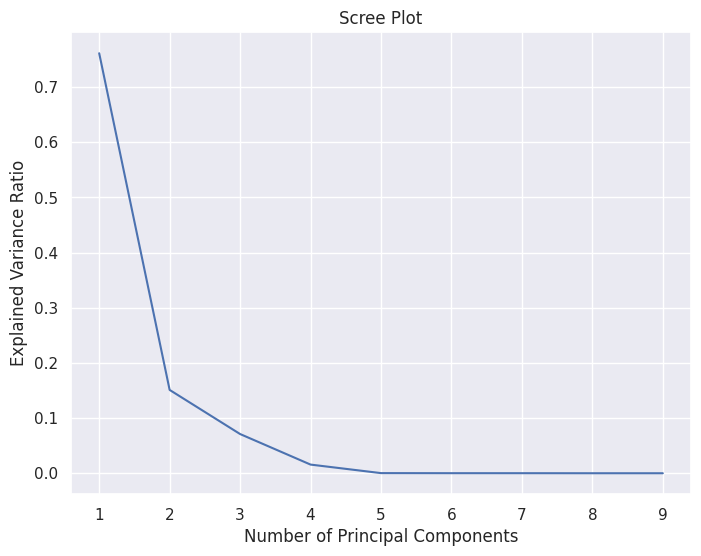

In [231]:
# Import the necessary libraries
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Perform PCA on the feature data (x_data)
pca = PCA(n_components=9)  # Choose the number of principal components you want to retain
x_pca = pca.fit_transform(x_data)

# Print the explained variance ratio of the principal components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

## Train Test Split

In [232]:
# Split the transformed data (x_pca) into training and testing sets
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0, stratify=y)

## Machine Learning Algorithms

### Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for x in range(20):
    lr = LogisticRegression(random_state=x)
    lr.fit(x_train_pca, y_train)
    y_pred_lr = lr.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

lr = LogisticRegression(random_state=best_x)
lr.fit(x_train_pca, y_train)
y_pred_lr = lr.predict(x_test_pca)

# Calculate the evaluation metrics
score_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
precision = round(precision_score(y_test, y_pred_lr) * 100, 2)
recall = round(recall_score(y_test, y_pred_lr) * 100, 2)
f1 = round(f1_score(y_test, y_pred_lr) * 100, 2)

# Print the results
print("Logistic Regression Performance:")
print("Accuracy: {0}%".format(score_lr))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

Logistic Regression Performance:
Accuracy: 83.43%
Precision: 85.71%
Recall: 84.0%
F1-score: 84.85%


### Support Vector Machine

In [234]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for x in range(20):
    svm = SVC(random_state=x)
    svm.fit(x_train_pca, y_train)
    y_pred_svm = svm.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

svm = SVC(random_state=best_x)
svm.fit(x_train_pca, y_train)
y_pred_svm = svm.predict(x_test_pca)

# Calculate the evaluation metrics
score_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
precision = round(precision_score(y_test, y_pred_svm) * 100, 2)
recall = round(recall_score(y_test, y_pred_svm) * 100, 2)
f1 = round(f1_score(y_test, y_pred_svm) * 100, 2)

# Print the results
print("Support Vector Machine Performance:")
print("Accuracy: {0}%".format(score_svm))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

Support Vector Machine Performance:
Accuracy: 71.27%
Precision: 71.05%
Recall: 81.0%
F1-score: 75.7%


### K-Nearest Neighbours

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train)
    y_pred_knn = knn.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_k = k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_pca, y_train)
y_pred_knn = knn.predict(x_test_pca)

# Calculate the evaluation metrics
score_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
precision = round(precision_score(y_test, y_pred_knn) * 100, 2)
recall = round(recall_score(y_test, y_pred_knn) * 100, 2)
f1 = round(f1_score(y_test, y_pred_knn) * 100, 2)

# Print the results
print("K-Nearest Neighbors Classifier Performance:")
print("Accuracy: {0}%".format(score_knn))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

K-Nearest Neighbors Classifier Performance:
Accuracy: 69.61%
Precision: 72.28%
Recall: 73.0%
F1-score: 72.64%


### Decision Tree

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train_pca, y_train)
    y_pred_dt = dt.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train_pca, y_train)
y_pred_dt = dt.predict(x_test_pca)

# Calculate the evaluation metrics
score_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
precision = round(precision_score(y_test, y_pred_dt) * 100, 2)
recall = round(recall_score(y_test, y_pred_dt) * 100, 2)
f1 = round(f1_score(y_test, y_pred_dt) * 100, 2)

# Print the results
print("Decision Tree Classifier Performance:")
print("Accuracy: {0}%".format(score_dt))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

Decision Tree Classifier Performance:
Accuracy: 80.11%
Precision: 82.0%
Recall: 82.0%
F1-score: 82.0%


### Naive Bayes

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for x in range(20):
    nb = GaussianNB()
    nb.fit(x_train_pca, y_train)
    y_pred_nb = nb.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

nb = GaussianNB()
nb.fit(x_train_pca, y_train)
y_pred_nb = nb.predict(x_test_pca)

# Calculate the evaluation metrics
score_nb = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
precision = round(precision_score(y_test, y_pred_nb) * 100, 2)
recall = round(recall_score(y_test, y_pred_nb) * 100, 2)
f1 = round(f1_score(y_test, y_pred_nb) * 100, 2)

# Print the results
print("Naive Bayes Classifier Performance:")
print("Accuracy: {0}%".format(score_nb))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

Naive Bayes Classifier Performance:
Accuracy: 85.08%
Precision: 86.87%
Recall: 86.0%
F1-score: 86.43%


### XBBoost

In [238]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_accuracy = 0
for x in range(20):
    xgb = XGBClassifier(random_state=x)
    xgb.fit(x_train_pca, y_train)
    y_pred_xgb = xgb.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

xgb = XGBClassifier(random_state=best_x)
xgb.fit(x_train_pca, y_train)
y_pred_xgb = xgb.predict(x_test_pca)

# Calculate the evaluation metrics
score_xgb = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
precision = round(precision_score(y_test, y_pred_xgb) * 100, 2)
recall = round(recall_score(y_test, y_pred_xgb) * 100, 2)
f1 = round(f1_score(y_test, y_pred_xgb) * 100, 2)

# Print the results
print("XGBoost Classifier Performance:")
print("Accuracy: {0}%".format(score_xgb))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

XGBoost Classifier Performance:
Accuracy: 87.85%
Precision: 89.8%
Recall: 88.0%
F1-score: 88.89%


### Neural Network

In [239]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Hyperparameter tuning for Neural Network using MLPClassifier
max_accuracy = 0
for x in range(20):
    nn = MLPClassifier(random_state=x)
    nn.fit(x_train_pca, y_train)
    y_pred_nn = nn.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_nn) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Create and train a Neural Network model using Keras
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=x_train_pca.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_pca, y_train, epochs=200, batch_size=32, validation_data=(x_test_pca, y_test))

# Make predictions on the test set
y_pred_nn = model.predict(x_test_pca)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Calculate the evaluation metrics for the Keras Neural Network model
score_nn = round(accuracy_score(y_test, y_pred_nn) * 100, 2)
precision_nn = round(precision_score(y_test, y_pred_nn) * 100, 2)
recall_nn = round(recall_score(y_test, y_pred_nn) * 100, 2)
f1_nn = round(f1_score(y_test, y_pred_nn) * 100, 2)

# Print the results for the Keras Neural Network model
print("Neural Network Model Performance:")
print("Accuracy: {0}%".format(score_nn))
print("Precision: {0}%".format(precision_nn))
print("Recall: {0}%".format(recall_nn))
print("F1-score: {0}%".format(f1_nn))

Epoch 1/200
23/23 [==============================] - 1s 16ms/step - loss: 6.2421 - accuracy: 0.5511 - val_loss: 4.9395 - val_accuracy: 0.5525
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 3.8890 - accuracy: 0.5525 - val_loss: 3.0661 - val_accuracy: 0.5525
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 2.2938 - accuracy: 0.5511 - val_loss: 1.6909 - val_accuracy: 0.5635
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 1.2025 - accuracy: 0.5870 - val_loss: 0.8927 - val_accuracy: 0.6022
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7791 - accuracy: 0.6257 - val_loss: 0.7257 - val_accuracy: 0.6133
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6713 - val_loss: 0.6600 - val_accuracy: 0.6354
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6334 - accuracy: 0.6920 - val_loss: 0.6375 - val_accuracy: 0.6298
Epoch 8/200


### Random Forest Classifier

In [240]:
max_accuracy = 0
for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train_pca, y_train)
    y_pred_rf = rf.predict(x_test_pca)
    current_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train_pca, y_train)
y_pred_rf = rf.predict(x_test_pca)

# Calculate the evaluation metrics
score_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
precision = round(precision_score(y_test, y_pred_rf) * 100, 2)
recall = round(recall_score(y_test, y_pred_rf) * 100, 2)
f1 = round(f1_score(y_test, y_pred_rf) * 100, 2)

# Print the results
print("Random Forest Classifier Performance:")
print("Accuracy: {0}%".format(score_rf))
print("Precision: {0}%".format(precision))
print("Recall: {0}%".format(recall))
print("F1-score: {0}%".format(f1))

Random Forest Classifier Performance:
Accuracy: 89.5%
Precision: 90.91%
Recall: 90.0%
F1-score: 90.45%


## Evaluation Metrics

### AUC ROC Curve

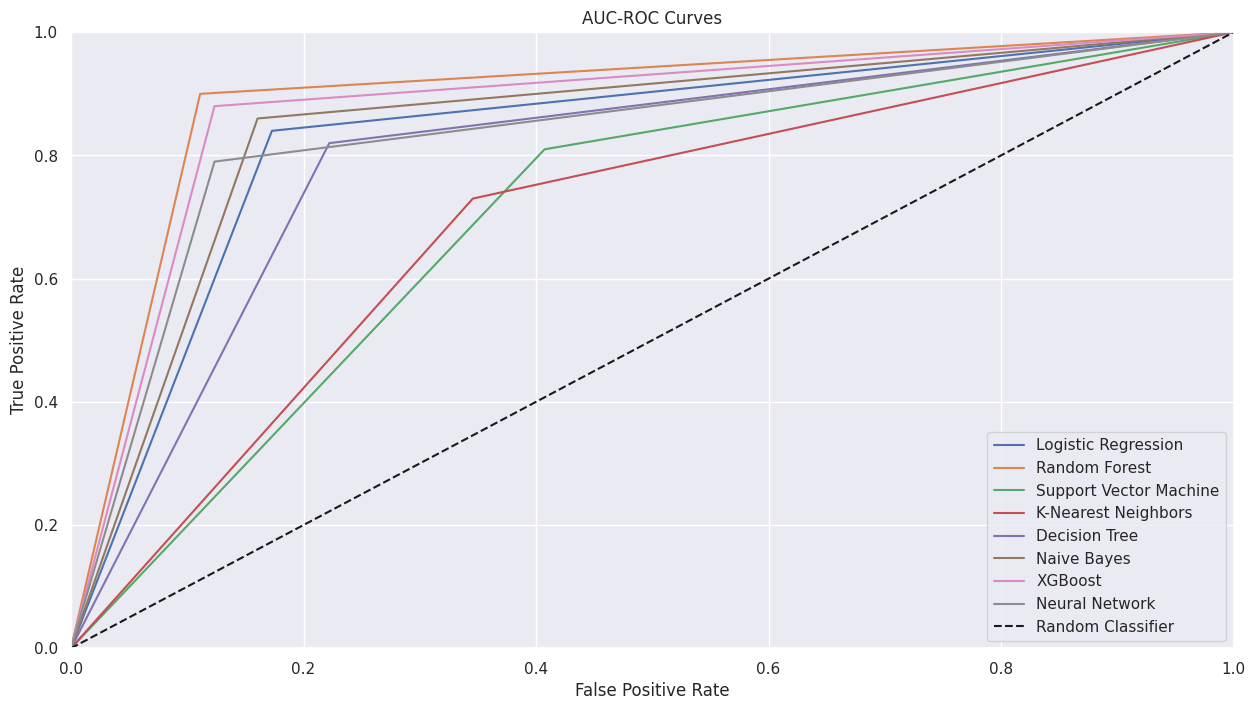

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

# Assuming you have the following variables already calculated
scores = [score_lr, score_rf, score_svm, score_knn, score_dt, score_nb, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Random Forest", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Naive Bayes", "XGBoost", "Neural Network"]
y_pred_models = [y_pred_lr, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_dt, y_pred_nb, y_pred_xgb, y_pred_nn]

# Calculate the AUC-ROC for each model
auc_scores = []
for i in range(len(algorithms)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_models[i])
    auc = roc_auc_score(y_test, y_pred_models[i])
    auc_scores.append(round(auc * 100, 2))

# Set the figure size
sns.set(rc={'figure.figsize':(15, 8)})

# Plot the AUC-ROC curves
plt.figure(figsize=(15, 8))
plt.title('AUC-ROC Curves')
for i in range(len(algorithms)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_models[i])
    plt.plot(fpr, tpr, label=algorithms[i])
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

### Accuracy Scores Comparison

The accuracy score achieved using Logistic Regression is: 83.43 %
The accuracy score achieved using Random Forest is: 89.5 %
The accuracy score achieved using Support Vector Machine is: 71.27 %
The accuracy score achieved using K-Nearest Neighbors is: 69.61 %
The accuracy score achieved using Decision Tree is: 80.11 %
The accuracy score achieved using Naive Bayes is: 85.08 %
The accuracy score achieved using XGBoost is: 87.85 %
The accuracy score achieved using Neural Network is: 82.87 %


Text(0, 0.5, 'Accuracy score')

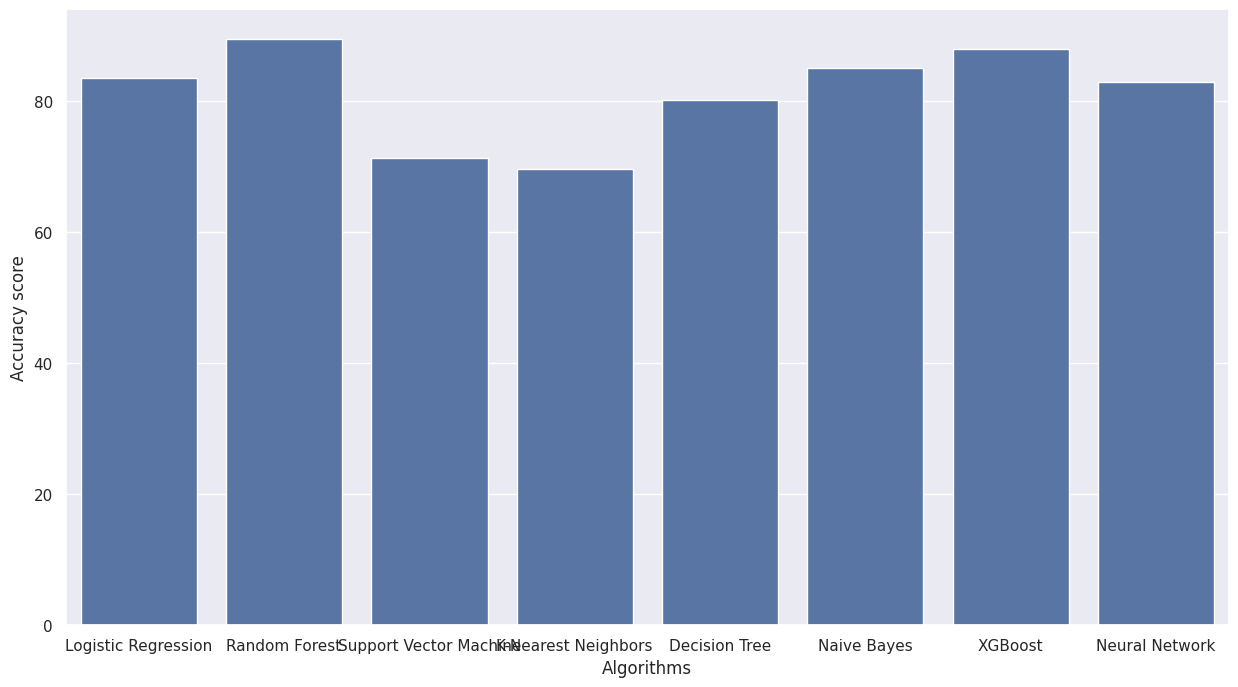

In [242]:
import pandas as pd

scores = [score_lr,score_rf,score_svm,score_knn,score_dt,score_nb,score_xgb, score_nn]
algorithms = ["Logistic Regression","Random Forest","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Naive Bayes","XGBoost", "Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

data = pd.DataFrame({'Accuracy': scores}, index=algorithms)

# Set the figure size
sns.set(rc={'figure.figsize':(15, 8)})

# Create the bar plot
ax = sns.barplot(data=data, x=data.index, y='Accuracy')

# Set the x and y labels
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

## Saving the Model

In [243]:
# Save the model # default xgb
import pickle

model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!
